### Introduction

The aim of this project is to develop a machine learning model that can accurately classify subscribers based on their mobile phone usage data and recommend one of Megaline's newer plans, Smart or Ultra. The goal is to analyze the behavior patterns of Megaline's subscribers and identify which plan (Smart or Ultra) best suits their needs.

By achieving this, Megaline can offer personalized plan recommendations to its subscribers, leading to an improved customer experience and potential increases in customer satisfaction and retention. The classification model will be evaluated for its performance on a test dataset, with the objective of reaching a minimum accuracy of 0.75.

In summary, the project aims to:

Develop a classification model that can accurately predict whether a subscriber should switch to the Smart or Ultra plan based on their mobile usage data.
Analyze and understand the behavior patterns of Megaline's subscribers.
Enhance customer satisfaction and retention through personalized plan recommendations that align with each subscriber's unique usage profile.

### Importing Libraries and Cleaning the data

In [1]:
#importing the necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
#reading the csv file into a data frame
df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
#printing the dataframe which displays the head and the tail, which is the first 5 rows and last 5 rows
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [4]:
#check for duplicated rows
df.duplicated().sum()

0

In [5]:
#check for missing values/ null values
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [6]:
#checking the data types using the info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [7]:
#changing the messages datatype
df['messages'] = df['messages'].astype(int)

In [8]:
#checking to see changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   int64  
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 125.7 KB


### Creating ML Models

In [9]:
# Split data frame into train, valid, and test dataframes in a 3:1:1 ratio
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df, test_size=0.4, random_state=77)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=77)

print(f"Shape of the train dataframe: {train_df.shape}")
print(f"Shape of valid dataframe: {valid_df.shape}")
print(f"Shape of Test dataframe: {test_df.shape}")

Shape of the train dataframe: (1928, 5)
Shape of valid dataframe: (643, 5)
Shape of Test dataframe: (643, 5)


In [10]:
#creating feature and target for each dataframes also known as X and y
train_features, train_target = train_df.drop(['is_ultra'], axis=1), train_df['is_ultra']
valid_features, valid_target = valid_df.drop(['is_ultra'], axis=1), valid_df['is_ultra']
test_features, test_target = test_df.drop(['is_ultra'], axis=1), test_df['is_ultra']

In [11]:
best_model = None
best_result = 0
for depth in range(1, 8):
    # create a model with the given depth
    tree_model = DecisionTreeClassifier(random_state=77, max_depth=depth)
    # train the model
    tree_model.fit(train_features, train_target)
    # get the model's predictions
    tree_predictions = tree_model.predict(valid_features)
    # calculate the accuracy
    result = accuracy_score(valid_target, tree_predictions) 
    if result > best_result:
        best_model = tree_model
        best_result = result

print("Best model:", tree_model)
print("Accuracy of the best model:", best_result)

Best model: DecisionTreeClassifier(max_depth=7, random_state=77)
Accuracy of the best model: 0.7916018662519441


In [12]:
best_score = 0
best_est = 0
# choose hyperparameter range
for est in range(1,18):
    # set number of trees
    forest_model = RandomForestClassifier(random_state=77, n_estimators=est)
    # train model on training set
    forest_model.fit(train_features, train_target)
    # calculate accuracy score on validation set
    score = forest_model.score(valid_features, valid_target)
    if score > best_score:
        # save best accuracy score on validation set
        best_score = score
        # save number of estimators corresponding to best accuracy score
        best_est = est

print(f"Accuracy of the best random forest model on the validation set (n_estimators = {best_est}): {best_score}")

Accuracy of the best random forest model on the validation set (n_estimators = 14): 0.7931570762052877


In [13]:
#Logistic Regresiion training and testing
lr_model = LogisticRegression(random_state=77, solver='liblinear')  # initialize logistic regression constructor with parameters random_state=54321 and solver='liblinear'
#Train model on training set
lr_model.fit(train_features, train_target)

#calculate accuracy score on training set
score_valid = lr_model.score(valid_features, valid_target)

print("Accuracy of the logistic regression model on the validation set:", score_valid)

Accuracy of the logistic regression model on the validation set: 0.7060653188180405


From the above ML training we see that the best performing algorithm is the Random Forest. Hence we will use that as the final model and test it against the test dataframe.

In [14]:
# Testing the random forest algothim agaisnt the test dataframe
# change n_estimators to get best model
final_model = RandomForestClassifier(random_state=77, n_estimators=14)
final_model.fit(train_features, train_target)

# get the model's predictions
final_predictions = final_model.predict(test_features)
# calculate the accuracy
result = accuracy_score(test_target, final_predictions)

print(f"Accuracy score of the algorithm on the test dataframe is: {result}")

Accuracy score of the algorithm on the test dataframe is: 0.8087091757387247


In [15]:
#Mean squared error
mse = mean_squared_error(test_target, final_predictions)
mse

0.19129082426127528

The MSE is approximately 0.1913.
A lower MSE value indicates that the model's predictions are closer to the actual values, suggesting better model performance. 

### Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate and display confusion matrix
conf_matrix = confusion_matrix(test_target, final_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[406  41]
 [ 82 114]]


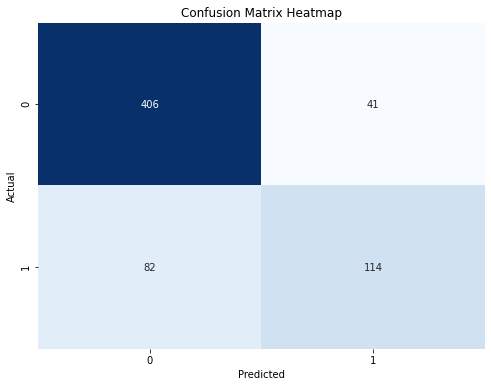

In [17]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(test_target), yticklabels=np.unique(test_target))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

From the above graph, there were 406 true positives/ correct positive prediction and 41 false positives/ 41 incorrect positive predictions, while there was 114 true negatives/ correct negative predictions and 82 false negatives/ incorrect negative predictions.

From the matix we can calculate:
- Precision- TP/(TP+FP) where TP is true positives (correctly predicted positives), and FP is false positives (incorrectly predicted positives). Precision indicates how many of the model's positive predictions were actually correct. High precision means that the model is making very few false positive predictions.
114/(114+41) = 114/155 = 0.735

- Recall- TP/(TP+FN) where TP is true positives (correctly predicted positives), and FN is false negatives (actual positives not predicted).
114/(114+82) = 114/196 = 0.581

- F1-Score- 2*(Precision*Recall)/ (Precision+Recall) he F1-score is a comprehensive metric that combines both precision and recall into a single score. It is useful when you want to find a balance between precision and recall, especially if one metric is disproportionately higher than the other.
2*(0.74*0.58)/(0.74+0.58) = 2*(0.43)/1.32 = 0.86/1.32 = 0.65

We can further calculate more data with the classification report below:

In [18]:
# Calculate and display precision, recall, and F1 score
print("\nClassification Report:")
print(classification_report(test_target, final_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       447
           1       0.74      0.58      0.65       196

    accuracy                           0.81       643
   macro avg       0.78      0.74      0.76       643
weighted avg       0.80      0.81      0.80       643



The classification report summarizes the model's performance across different classes:

- Precision measures the proportion of correct positive predictions out of all predicted positives. High precision implies accurate positive class predictions. Class 0 has a precision of 0.83, showing strong accuracy for the negative class. Class 1's precision is 0.74, indicating somewhat accurate positive class predictions.

- Recall measures the proportion of correct positive predictions out of all actual positive cases. High recall indicates successful identification of most actual positive cases. Class 0's recall of 0.91 demonstrates excellent identification of negative cases. Class 1's recall is 0.58, indicating missed positive cases.

- F1-Score is the harmonic mean of precision and recall, balancing the trade-off between them. Class 0 has an F1-score of 0.87, indicating a strong balance for the negative class. Class 1's F1-score of 0.65 suggests room for improvement in balancing precision and recall.

- Support is the count of each class in the dataset, with 447 instances of class 0 and 196 instances of class 1.

Overall accuracy of 0.81 means the model correctly classified 81% of observations.
Macro and weighted averages calculate the average precision, recall, and F1-score across classes, with macro average giving equal weight to each class, and weighted average adjusting for class support.
In summary, the model excels at classifying the negative class (class 0), but improvement is needed for identifying the positive class (class 1).

### Conclusion
#### Machine Learning Models
In this project, we aimed to develop a model that can accurately classify Megaline's subscribers based on their mobile phone usage data and recommend one of the company's newer plans, Smart or Ultra. We explored three different machine learning models: decision tree, random forest, and logistic regression, and evaluated their performance on test and validation datasets.

- The decision tree model (DecisionTreeClassifier with a maximum depth of 7 and a random state of 77) achieved an accuracy of 0.7916 on the test set. This model offers interpretability and simplicity, making it a solid choice for classification tasks.

- The random forest model (RandomForestClassifier with 14 estimators) performed the best, achieving an accuracy of 0.7932 on the validation set. This model demonstrates strong predictive accuracy and robustness due to its ensemble approach, making it the top performer in this study.

- The logistic regression model achieved an accuracy of 0.7061 on the validation set. While logistic regression is a straightforward classification algorithm, its performance in this specific task was not as strong compared to the other models.

- Based on the results, the random forest model stands out as the most suitable choice for this task due to its slightly higher accuracy and robust performance. However, the decision tree model remains a strong alternative, providing a more interpretable model.

- Future work could involve fine-tuning the chosen models, exploring other types of algorithms, or incorporating additional data features to further improve classification accuracy. Additionally, monitoring model performance over time can ensure that the model remains effective as subscriber behavior patterns evolve.

#### Confusion Matrix
- The classification report shows that the model performs well in classifying the negative class (class 0) with high precision (0.83) and recall (0.91), leading to an F1-score of 0.87. However, the model struggles more with classifying the positive class (class 1), with lower precision (0.74) and recall (0.58), resulting in an F1-score of 0.65. The overall accuracy of 0.81 is good, but there is room for improvement in identifying positive cases more accurately to achieve a better balance between precision and recall across both classes.